In [19]:
import numpy as np
from astropy.table import Table
import matplotlib.pyplot as plt 
from astropy.table import hstack

We cut quasars at z=2 : otherwise our quasar sample would go into the stellar locus

In [56]:
# Load the cross-matched HLC-NSC catalog
hlc_nsc = Table(np.load('hlc_nsc_half_arcsec.npy'))

# Load the QSO training sample
qso = Table(np.load('hlc_nsc_sdss_qso_matches.npy'))

# Load the standard stars training sample 
stars = Table(np.load('hlc_nsc_sdss_stars_matches.npy'))

In [57]:
def make_dereddened_colors(table):
    # Make column with HLC dereddened magnitudes 
    filters = 'ugriz'
    for f in filters : 
        table['HLC'+f+'mag_dered'] = table['HLC'+f+'mag'] - table['HLC'+f+'RED']

    # Make column with HLC colors based on dereddened magnitudes
    for i in range(len(filters)-1):
        f1,f2 = filters[i], filters[i+1]
        table['HLC'+f1+'-'+f2] = table['HLC'+f1+'mag_dered']-table['HLC'+f2+'mag_dered']
        
make_dereddened_colors(hlc_nsc)
make_dereddened_colors(stars)
make_dereddened_colors(qso)

Bovy+2011 :  http://iopscience.iop.org/article/10.1088/0004-637X/729/2/141/pdf ( a good illustration of how QSO really move out of the u-g<0.5 locus beyond z=2 )

<img src='bovy2011_fig7.png' width=900>

Fan+1999 : http://iopscience.iop.org/article/10.1086/300848/pdf ( shows the redshift color evolution of quasars) 
<img src='fan1999_fig12.png'>

Suberlak+2017: Hessian with SDSS S82 sources from the LSST re-processed S82 data
<img src='suberlak2017_fig11.png' width=500> Colors in the upper-right panel indicate the selection by region in color-color space, as in Ivezic+2004 http://faculty.washington.edu/ivezic/Publications/astroph_0310566.pdf. Objects in the red region are mostly quasars,  those in the blue are  hot stars (white dwarfs),  in black - main sequence stars, and in green - the transitional region. It shows  that indeed quasars occupy the same color-color space as in Fig.9.18 from AstroML <img src='fig9-18_astroml.png' width=600>  Here "Stars are indicated by gray points, while quasars are indicated by black points." (http://www.astroml.org/book_figures/chapter9/fig_star_quasar_ROC.html)

(array([  106.,   412.,   668.,   891.,  1425.,  2818.,  6627.,  8280.,
          795.,     0.]),
 array([ 0.5 ,  0.56,  0.62,  0.68,  0.74,  0.8 ,  0.86,  0.92,  0.98,
         1.04,  1.1 ]),
 <a list of 10 Patch objects>)

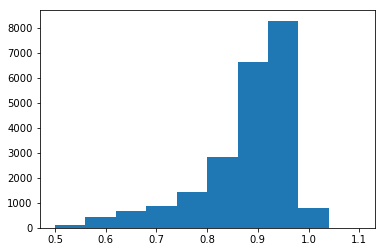

In [31]:
# Just to confirm - since these 
# are quasars,  their class_star should be pretty high...
plt.hist(qso['NSCclass_star'], range=(0.5,1.1))

Plot the HLC-NSC all points on u-g,  g-r  diagram,  and overplot the QSO and SDSS,
using HLC colors. Deredden the HLC magnitudes -  we need to brighten the apparent magnitude by the amount of reddening to correct for the extinction  - see eg. http://www.astro.ncu.edu.tw/~wchen/Courses/ISM/ ). To use NSC colors, they would have to be dereddened using the reddening called 'NSCebv'.


In [59]:
hlc_nsc['HLCu-g']

-21.4115
-0.0382772
-21.1411
-21.0304
-20.7839
-22.9756
-21.6283
-22.544
-22.2823
-23.0425
-20.8679


/Users/chris/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys
/Users/chris/anaconda3/envs/py36/lib/python3.6/site-packages/astropy/table/column.py:929: RuntimeWarning: invalid value encountered in greater
  return getattr(self.data, oper)(other)


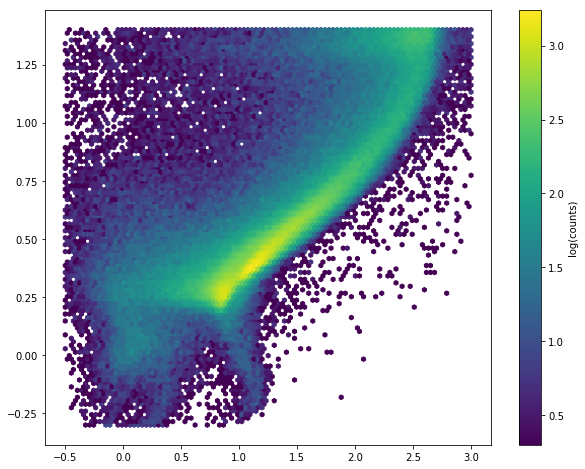

In [60]:
%matplotlib inline

# Select HLC-NSC data : 
# -->  point sources 
m_star = hlc_nsc['NSCclass_star'] > 0.5
# --> signal / noise > 5 
m_sn = hlc_nsc['HLCgmag'] /hlc_nsc['HLCgerr'] > 5
m = m_sn * m_star

# 2D-histogram of objects in the g-r vs r-i color diagram 
fig, ax1 = plt.subplots(1, 1, figsize=(10, 8))
im1 = ax1.hexbin(hlc_nsc['HLCu-g'][m],
                 hlc_nsc['HLCg-r'][m] ,bins='log', cmap=plt.cm.viridis,
               mincnt=1, extent=(-0.5,3, -0.3,1.4))
plt.colorbar(im1, label='log(counts)')

/Users/chris/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in true_divide
  del sys.path[0]
/Users/chris/anaconda3/envs/py36/lib/python3.6/site-packages/astropy/table/column.py:929: RuntimeWarning: invalid value encountered in greater
  return getattr(self.data, oper)(other)
/Users/chris/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in true_divide


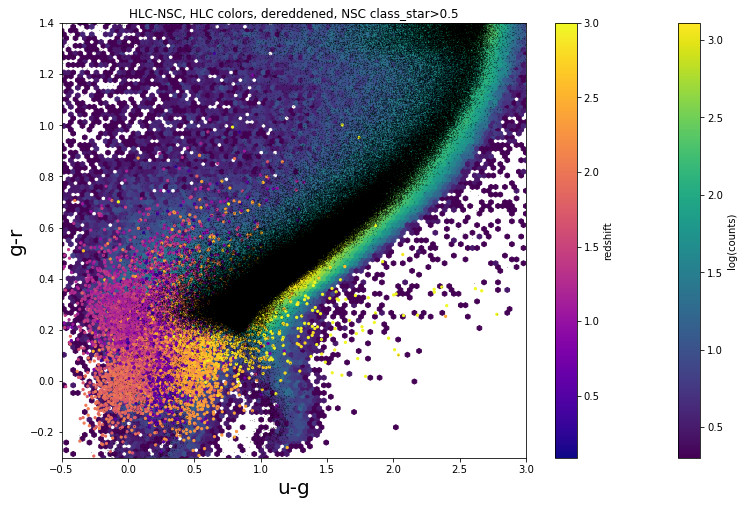

In [94]:
%matplotlib inline

# 2D-histogram of objects in the g-r vs r-i color diagram 
fig, ax1 = plt.subplots(1, 1, figsize=(13, 8))
im1 = ax1.hexbin(ug_hlc,gr_hlc, bins='log', cmap=plt.cm.viridis,
               mincnt=1, extent=(-0.5,3, -0.3,1.4))
plt.colorbar(im1, label='log(counts)')

# QSO
# -->  point sources 
m_star = qso['NSCclass_star'] > 0.5
# --> signal / noise > 5 
m_sn = qso['HLCgmag'] / qso['HLCgerr'] > 5
m = m_sn * m_star

# deredden the HLC magnitudes ...
u = qso['HLCumag'][m]  - qso['HLCuRED'][m]
g = qso['HLCgmag'][m]  - qso['HLCgRED'][m]
r  = qso['HLCrmag'][m]  - qso['HLCrRED'][m]
ug_qso = u-g
gr_qso = g-r
redshift_qso=qso['Z'].data[m]
cmap = plt.get_cmap('plasma', len(redshift_qso)) 


# STARS
# -->  point sources 
m_star = stars['NSCclass_star'] > 0.5
# --> signal / noise > 5 
m_sn = stars['HLCgmag'] / stars['HLCgerr'] > 5
m = m_sn * m_star

# deredden the HLC magnitudes ...
u = stars['HLCumag'][m]  - stars['HLCuRED'][m]
g = stars['HLCgmag'][m]  - stars['HLCgRED'][m]
r  = stars['HLCrmag'][m]  - stars['HLCrRED'][m]
ug_star = u-g
gr_star = g-r

# QUASARS
im = ax1.scatter(ug_qso, gr_qso, c=redshift_qso, cmap=cmap, s=5, vmax=3)
plt.colorbar(im, label='redshift')

# STARS 
ax1.scatter(ug_star, gr_star,c='k',s=0.01, label='stars')

ax1.set_xlim(-0.5,3)
ax1.set_ylim(-0.3,1.4)
ax1.set_xlabel('u-g',fontsize=20)
ax1.set_ylabel('g-r',fontsize=20)
ax1.set_title('HLC-NSC, HLC colors, dereddened, NSC class_star>0.5')
plt.savefig('hlc_nsc_qso_stars.png', bbox_inches='tight')

Above quasars are colored by their redshift. The black points are SDSS standard stars.  The background are all HLC-NSC sources. This tells us that indeed it should be possible to separate stars and QSO using u-g vs g-r color information. 

# KNN

In [17]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import colors

from sklearn.neighbors import KNeighborsClassifier
from astroML.utils import split_samples
from astroML.utils import completeness_contamination

In [40]:
# QSO
# -->  point sources 
#m_star = qso['NSCclass_star'] > 0.5
# --> signal / noise > 5 
m_g_sn = qso['HLCgmag'] / qso['HLCgerr'] > 5
m_u_sn = qso['HLCumag'] / qso['HLCuerr'] > 5
m_r_sn = qso['HLCrmag'] / qso['HLCrerr'] > 5
m_redshift = qso['Z'] < 2.5

m = m_g_sn * m_u_sn * m_r_sn  * m_redshift
print('We select ', np.sum(m), ' of ', len(m))
quasars = qso[m]

We select  7250  of  22205


/Users/chris/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """
/Users/chris/anaconda3/envs/py36/lib/python3.6/site-packages/astropy/table/column.py:929: RuntimeWarning: invalid value encountered in greater
  return getattr(self.data, oper)(other)
/Users/chris/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  
/Users/chris/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys


In [41]:
# STARS
# -->  point sources 
#m_star = stars['NSCclass_star'] > 0.5
# --> signal / noise > 5 
m_g_sn = stars['HLCgmag'] / stars['HLCgerr'] > 5
m_u_sn = stars['HLCumag'] / stars['HLCuerr'] > 5
m_r_sn = stars['HLCrmag'] / stars['HLCrerr'] > 5

m =  m_g_sn * m_u_sn* m_r_sn
print('We select ', np.sum(m), ' of ', len(m))
stars = stars[m]

/Users/chris/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """
/Users/chris/anaconda3/envs/py36/lib/python3.6/site-packages/astropy/table/column.py:929: RuntimeWarning: invalid value encountered in greater
  return getattr(self.data, oper)(other)
/Users/chris/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  


We select  260872  of  693857


In [42]:
# stack colors into matrix X : it is the training set 
# size : ( number of qso + number of stars ) * ( number of colors )
Nqso = len(quasars)
Nstars = len(stars)
X = np.empty((Nqso + Nstars, 4), dtype=float)

In [ ]:
X[:Nqso, 0] = quasars['mag_u'] - quasars['mag_g']
X[:Nqso, 1] = quasars['mag_g'] - quasars['mag_r']
X[:Nqso, 2] = quasars['mag_r'] - quasars['mag_i']
X[:Nqso, 3] = quasars['mag_i'] - quasars['mag_z']

X[Nqso:, 0] = stars['upsf'] - stars['gpsf']
X[Nqso:, 1] = stars['gpsf'] - stars['rpsf']
X[Nqso:, 2] = stars['rpsf'] - stars['ipsf']
X[Nqso:, 3] = stars['ipsf'] - stars['zpsf']


In [51]:
stars.colnames

['RA',
 'DEC',
 'RArms',
 'DECrms',
 'Ntot',
 'A_r',
 'Nobs_u',
 'mmed_u',
 'mmu_u',
 'msig_u',
 'mrms_u',
 'mchi2_u',
 'Nobs_g',
 'mmed_g',
 'mmu_g',
 'msig_g',
 'mrms_g',
 'mchi2_g',
 'Nobs_r',
 'mmed_r',
 'mmu_r',
 'msig_r',
 'mrms_r',
 'mchi2_r',
 'Nobs_i',
 'mmed_i',
 'mmu_i',
 'msig_i',
 'mrms_i',
 'mchi2_i',
 'Nobs_z',
 'mmed_z',
 'mmu_z',
 'msig_z',
 'mrms_z',
 'mchi2_z',
 'RA_W',
 'HLCumag',
 'HLCgmag',
 'HLCrmag',
 'HLCimag',
 'HLCzmag',
 'HLCuerr',
 'HLCgerr',
 'HLCrerr',
 'HLCierr',
 'HLCzerr',
 'HLCuRED',
 'HLCgRED',
 'HLCrRED',
 'HLCiRED',
 'HLCzRED',
 'HLC_LC_NAME',
 'HLC_MEAN_OBJECT_TYPE',
 'HLC_RA_MEAN_CLIP_W',
 'HLC_MEAN_CHILD',
 'HLC_DEC_MEAN_CLIP',
 'NSCra',
 'NSCdec',
 'NSCpmra',
 'NSCpmraerr',
 'NSCpmdec',
 'NSCpmdecerr',
 'NSCmjd',
 'NSCdeltamjd',
 'NSCgmag',
 'NSCgrms',
 'NSCgerr',
 'NSCrmag',
 'NSCrrms',
 'NSCrerr',
 'NSCimag',
 'NSCirms',
 'NSCierr',
 'NSCclass_star',
 'NSCfwhm',
 'NSCebv',
 'NSCnphot',
 'NSCraW',
 'sep_2d_arcsec_HLC_NSC',
 'sep_2d_arcsec_NSC_

In [50]:
#qso['HLCu-g']

In [21]:



m = m_g_sn * m_star

# deredden the HLC magnitudes ...
u = qso['HLCumag'][m]  - qso['HLCuRED'][m]
g = qso['HLCgmag'][m]  - qso['HLCgRED'][m]
r  = qso['HLCrmag'][m]  - qso['HLCrRED'][m]
ug_qso = u-g
gr_qso = g-r
redshift_qso=qso['Z'].data[m]
cmap = plt.get_cmap('plasma', len(redshift_qso)) 


# STARS
# -->  point sources 
m_star = stars['NSCclass_star'] > 0.5
# --> signal / noise > 5 
m_sn = stars['HLCgmag'] / stars['HLCgerr'] > 5
m = m_sn * m_star

# deredden the HLC magnitudes ...
u = stars['HLCumag'][m]  - stars['HLCuRED'][m]
g = stars['HLCgmag'][m]  - stars['HLCgRED'][m]
r  = stars['HLCrmag'][m]  - stars['HLCrRED'][m]
ug_star = u-g
gr_star = g-r



umagSDSS,gmagSDSS,rmagSDSS,imagSDSS,zmagSDSS,uerrSDSS,gerrSDSS,rerrSDSS,ierrSDSS,zerrSDSS,SDSS_NAME,RA,DEC,THING_ID,PLATE,MJD,FIBERID,SPECTRO,Z,Z_ERR,SOURCE_Z,Z_VI,Z_PIPE,Z_PIPE_ERR,ZWARNING,Z_PCA,Z_PCA_ER,Z_MGII,BOSS_TARGET1,ANCILLARY_TARGET1,ANCILLARY_TARGET2,EBOSS_TARGET0,EBOSS_TARGET1,EBOSS_TARGET2,N_SPEC_SDSS,N_SPEC_BOSS,N_SPEC,PLATE_DUPLICATE [51],MJD_DUPLICATE [51],FIBERID_DUPLICATE [51],SPECTRO_DUPLICATE [51],BI_CIV,ERR_BI_CIV,RUN_NUMBER,RERUN_NUMBER,COL_NUMBER,FIELD_NUMBER,OBJ_ID,PSFFLUX [5],IVAR_PSFFLUX [5],MI,GAL_EXT [5],RASS_COUNTS,RASS_COUNTS_SNR,SDSS2ROSAT_SEP,FLUX_0.2_2.0keV,FLUX_0.2_2.0keV_ERR,FLUX_2.0_12.0keV,FLUX_2.0_12.0keV_ERR,FLUX_0.2_12.0keV,FLUX_0.2_12.0keV_ERR,LUM_0.2_12.0keV,SDSS2XMM_SEP,GALEX_MATCHED,FUV,FUV_IVAR,NUV,NUV_IVAR,JMAG,ERR_JMAG,JSNR,JRDFLAG,HMAG,ERR_HMAG,HSNR,HRDFLAG,KMAG,ERR_KMAG,KSNR,KRDFLAG,SDSS2MASS_SEP,W1MAG,ERR_W1MAG,W1SNR,W1CHI2,W2MAG,ERR_W2MAG,W2SNR,W2CHI2,W3MAG,ERR_W3MAG,W3SNR,W3CHI2,W4MAG,ERR_W4MAG,W4SNR,W4CHI2,CC_FLAGS,PH_FLAGS,SDSS2WISE_SEP,UKIDSS_MATCHED,YFLUX,YFLUX_ERR,JFLUX,JFLUX_ERR,HFLUX,HFLUX_ERR,KFLUX,KFLUX_ERR,FIRST_MATCHED,FIRST_FLUX,FIRST_SNR,SDSS2FIRST_SEP,RA_W,HLCumag,HLCgmag,HLCrmag,HLCimag,HLCzmag,HLCuerr,HLCgerr,HLCrerr,HLCierr,HLCzerr,HLCuRED,HLCgRED,HLCrRED,HLCiRED,HLCzRED,HLC_LC_NAME,HLC_MEAN_OBJECT_TYPE,HLC_RA_MEAN_CLIP_W,HLC_MEAN_CHILD,HLC_DEC_MEAN_CLIP,NSCra,NSCdec,NSCpmra,NSCpmraerr,NSCpmdec,NSCpmdecerr,NSCmjd,NSCdeltamjd,NSCgmag,NSCgrms,NSCgerr,NSCrmag,NSCrrms,NSCrerr,NSCimag,NSCirms,NSCierr,NSCclass_star,NSCfwhm,NSCebv,NSCnphot,NSCraW,sep_2d_arcsec_HLC_NSC,sep_2d_arcsec_NSC_SDSS
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str18,float64,float64,int32,int16,int32,int16,str4,float64,float64,str4,float64,float64,float64,int16,float64,float64,float64,int64,int64,int64,int64,int64,int64,int16,int16,int16,int32,int32,int32,str1,float64,float64,int16,str1,int16,int16,str1,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float32,float64,float64,float64,float64,float64,float64,float32,int16,float64,float64,float32,int16,float64,float64,float32,int16,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str4,str4,float64,float32,float64,float64,float64,float64,float64,float64,float64,float64,int16,float64,float64,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,str46,float32,float64,float32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,float64,float64,float64
22.1906700134,21.1964054108,21.2392272949,21.1405181885,20.5183849335,0.16586509347,0.0400205291808,0.0460151173174,0.0580704212189,0.109876945615,024000.63+010317.0,40.0026451259,1.05474779582,119449995,4240,55455,626,BOSS,2.444,0.0,VI,2.44400000572,2.44466137886,0.000227598633501,0,2.4412034,-1.0,-1.0,2199023259648,0,0,0,0,0,0,2,2,0 .. -1,0 .. -1,0 .. -1,- .. -,0.0,0.0,0,-,0,0,-,1.31489348412 .. 6.11535596848,23.7081451416 .. 2.46644902229,-25.258038,0.146651133895 .. 0.043694358319,0.0,0.0,-1.0,nan,nan,nan,nan,nan,nan,nan,nan,1.0,0.0,0.0,0.0,0.0,nan,nan,nan,-1,nan,nan,nan,-1,nan,nan,nan,-1,nan,17.731,0.168,6.5,0.9723,17.167,0.503,2.20000004768,0.9,12.27,nan,1.20000004768,0.9772,9.051,0.168,0.800000011921,0.9458,0000,BCUU,0.376177,1.0,2.45499973319e-31,3.05495847289e-32,2.42246651644e-31,3.96596012956e-32,2.05076744444e-31,6.26982943402e-32,1.08963473881e-30,5.58935009536e-31,0,-1.0,-1.0,-1.0,40.0026451259,0.0,20.5863,20.5904,20.594,20.2948,0.0,0.00584923,0.00602348,0.00865205,0.0260801,0.178341,0.131222,0.0951729,0.0721667,0.0511671,RA_02_to_03/40/lc_02_40_00.635_+01_03_17.172_t,5.85,40.002643404,0.0,1.05477034461,40.0026631711,1.05476662324,-3.28887368814,7.07980891035,-6.73783145537,7.23041366371,56955.232878

Test the example from the lecture ... 


In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import colors

from sklearn.neighbors import KNeighborsClassifier
from astroML.datasets import fetch_rrlyrae_combined
from astroML.utils import split_samples
from astroML.utils import completeness_contamination

#----------------------------------------------------------------------
# get data and split into training & testing sets
X, y = fetch_rrlyrae_combined()
X = X[:, [1, 0, 2, 3]]  # rearrange columns for better 1-color results
(X_train, X_test), (y_train, y_test) = split_samples(X, y, [0.75, 0.25],
                                                     random_state=0)



In [5]:
from astroML.datasets import fetch_dr7_quasar
from astroML.datasets import fetch_sdss_sspp

quasars = fetch_dr7_quasar()
stars = fetch_sdss_sspp()



downloading DR7 quasar dataset from http://das.sdss.org/va/qsocat/dr7qso.dat.gz to /Users/chris/astroML_data
[=========================================]  12.82Mb / 12.82Mb   


In [11]:
# Truncate data for speed
quasars = quasars[::5]  
stars = stars[::5]

# stack colors into matrix X
Nqso = len(quasars)
Nstars = len(stars)

In [14]:
X = np.empty((Nqso + Nstars, 4), dtype=float)

In [16]:

X.shape

(86609, 4)

completeness (as a fn of neighbors and colors) [[ 0.22627737  0.3649635   0.46715328  0.54014599]
 [ 0.02919708  0.18248175  0.2919708   0.3649635 ]
 [ 0.01459854  0.29927007  0.48905109  0.60583942]
 [ 0.00729927  0.23357664  0.40145985  0.53284672]
 [ 0.          0.23357664  0.40145985  0.52554745]]
contamination [[ 0.78014184  0.53271028  0.44347826  0.41732283]
 [ 0.76470588  0.5         0.25925926  0.21875   ]
 [ 0.875       0.5         0.27173913  0.24545455]
 [ 0.875       0.44827586  0.24657534  0.23958333]
 [ 0.          0.34693878  0.26666667  0.23404255]]


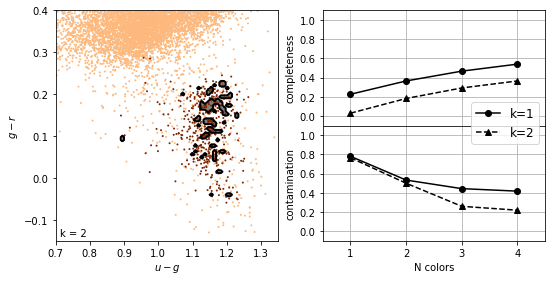

In [1]:

N_tot = len(y)
N_st = np.sum(y == 0)
N_rr = N_tot - N_st
N_train = len(y_train)
N_test = len(y_test)
N_plot = 5000 + N_rr

#----------------------------------------------------------------------
# perform Classification
classifiers = []
predictions = []
Ncolors = np.arange(1, X.shape[1] + 1)
kvals = [1, 2, 5, 10, 40]

for k in kvals:
    classifiers.append([])
    predictions.append([])
    for nc in Ncolors:
        clf = KNeighborsClassifier(n_neighbors=k)
        clf.fit(X_train[:, :nc], y_train)
        y_pred = clf.predict(X_test[:, :nc])

        classifiers[-1].append(clf)
        predictions[-1].append(y_pred)

completeness, contamination = completeness_contamination(predictions, y_test)

print ("completeness (as a fn of neighbors and colors)", completeness)
print ("contamination", contamination)

#------------------------------------------------------------
# Compute the decision boundary
clf = classifiers[1][1]
xlim = (0.7, 1.35)
ylim = (-0.15, 0.4)

xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 71),
                     np.linspace(ylim[0], ylim[1], 81))

Z = clf.predict(np.c_[yy.ravel(), xx.ravel()])
Z = Z.reshape(xx.shape)

#----------------------------------------------------------------------
# plot the results
fig = plt.figure(figsize=(8, 4))
fig.subplots_adjust(bottom=0.15, top=0.95, hspace=0.0,
                    left=0.1, right=0.95, wspace=0.2)

# left plot: data and decision boundary
ax = fig.add_subplot(121)
im = ax.scatter(X[-N_plot:, 1], X[-N_plot:, 0], c=y[-N_plot:],
                s=4, lw=0, cmap=plt.cm.Oranges, zorder=2)
im.set_clim(-0.5, 1)

im = ax.imshow(Z, origin='lower', aspect='auto',
               cmap=plt.cm.binary, zorder=1,
               extent=xlim + ylim)
im.set_clim(0, 2)

ax.contour(xx, yy, Z, [0.5], linewidths=2., colors='k')

ax.set_xlim(xlim)
ax.set_ylim(ylim)

ax.set_xlabel('$u-g$')
ax.set_ylabel('$g-r$')

ax.text(0.02, 0.02, "k = %i" % kvals[1],
        transform=ax.transAxes)

# plot completeness vs Ncolors
ax = fig.add_subplot(222)

ax.plot(Ncolors, completeness[0], 'o-k', label='k=%i' % kvals[0])
ax.plot(Ncolors, completeness[1], '^--k', label='k=%i' % kvals[1])

ax.xaxis.set_major_locator(plt.MultipleLocator(1))
ax.yaxis.set_major_locator(plt.MultipleLocator(0.2))
ax.xaxis.set_major_formatter(plt.NullFormatter())

ax.set_ylabel('completeness')
ax.set_xlim(0.5, 4.5)
ax.set_ylim(-0.1, 1.1)
ax.grid(True)

# plot contamination vs Ncolors
ax = fig.add_subplot(224)
ax.plot(Ncolors, contamination[0], 'o-k', label='k=%i' % kvals[0])
ax.plot(Ncolors, contamination[1], '^--k', label='k=%i' % kvals[1])
ax.legend(prop=dict(size=12),
          loc='lower right',
          bbox_to_anchor=(1.0, 0.79))

ax.xaxis.set_major_locator(plt.MultipleLocator(1))
ax.yaxis.set_major_locator(plt.MultipleLocator(0.2))
ax.xaxis.set_major_formatter(plt.FormatStrFormatter('%i'))
ax.set_xlabel('N colors')
ax.set_ylabel('contamination')
ax.set_xlim(0.5, 4.5)
ax.set_ylim(-0.1, 1.1)
ax.grid(True)

plt.show()